In [ ]:
#   conda env update --file binder/environment.yml
#   conda activate k3d-demo

In [3]:
%%capture
# Requirements
!pip install nibabel vtk
#!pip install k3d

In [7]:
import k3d
import math
import numpy as np
from k3d.helpers import download

In [8]:
import vtk
from vtk.util import numpy_support

filename = download('https://vedo.embl.es/examples/data/embryo.slc')
reader = vtk.vtkSLCReader()
reader.SetFileName(filename)
reader.Update()
vti = reader.GetOutput()

bounds = vti.GetBounds()
x, y, z = vti.GetDimensions()
volume_data = numpy_support.vtk_to_numpy(vti.GetPointData().GetArray(0)).reshape(-1, y, x)

In [17]:
%%capture 
# 不是这里的问题
!pip install ipywidgets>=7.0.1
!pip install traittypes
!pip install traitlets
!pip install msgpack
!pip install six

In [9]:
embryo = k3d.volume(volume_data.astype(np.float16), 
                    color_map=np.array(k3d.basic_color_maps.BlackBodyRadiation, dtype=np.float32), 
                    bounds=bounds)

plot = k3d.plot()
plot += embryo
plot.display()

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

Output()

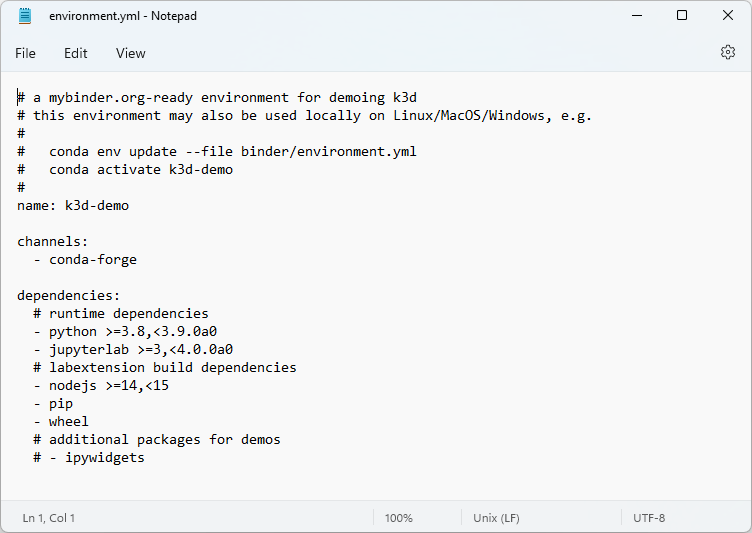

In [10]:
embryo = k3d.mip(volume_data.astype(np.float16), 
                 color_map=np.array(k3d.basic_color_maps.BlackBodyRadiation, dtype=np.float32), 
                 bounds=bounds)

plot = k3d.plot(background_color=0, grid_visible=False)
plot += embryo
plot.display()

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], camera_ani…

Output()

In [11]:
plot.lighting = 0

In [12]:
import nibabel as nib

filename = download('https://github.com/FNNDSC/data/raw/master/nifti/adi_brain/adi_brain.nii.gz')

nii_source = nib.load(filename)
img = nii_source.get_fdata()
dx, dy, dz = nii_source.header.get_zooms()
img = np.swapaxes(img,0,2).astype(np.float32)
nz, ny, nx = img.shape

volume = k3d.volume(img, color_range=[50,1000], color_map=np.array(k3d.basic_color_maps.Jet, dtype=np.float32))

plot = k3d.plot()
plot += volume
plot.display()

Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, axes_helper_colors=[16711680, 65280, 255], background…

Output()

In [13]:
volume.samples = 1024.0

In [14]:
volume.color_range = [650, 1500]